In [15]:
import pandas as pd
import numpy as np

path = '/mnt/raid-cita/dtamayo/Stability/data/iaswhfastcomparison/'
df_ref = pd.read_csv(path+'1e6datasetias15.csv', index_col=0)
dts = [0.3, 0.2, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.01, 0.002]
datasets = ['ias15perturbed'] + ['whfastdt'+"{:.0e}".format(dt) for dt in dts]
frames = [pd.read_csv(path+'1e6dataset'+dataset+'.csv', index_col=0) for dataset in datasets]
dfs = dict(zip(datasets, frames))

ias15perturbed
-----
Took 324.371049543 hours compared to 314.334433183 for reference IAS15 simulation (0.97x faster)
985 unstable outcomes vs 995 in reference IAS15 simulations
927 initial conditions where both were unstable
Median: 4.565 vs 4.588 (IAS15). Rel error = 5.124e-03
Mean: 4.591 vs 4.593 (IAS15). Rel error = 5.314e-04
Standard Deviation: 0.6733 vs 0.6929 (IAS15). Rel error = 2.827e-02
Probability of being drawn from the same distribution = 0.937824085319
Number of longer instability times: 469 Number shorter: 458 Asymmetry: 0.0118662351672
*****
*****
whfastdt3e-01
-----
Took 0.290790530311 hours compared to 314.334433183 for reference IAS15 simulation (1080.97x faster)
1933 unstable outcomes vs 995 in reference IAS15 simulations
962 initial conditions where both were unstable
Median: 3.721 vs 4.654 (IAS15). Rel error = 2.006e-01
Mean: 3.763 vs 4.66 (IAS15). Rel error = 1.925e-01
Standard Deviation: 0.5434 vs 0.7176 (IAS15). Rel error = 2.427e-01
Probability of being drawn 

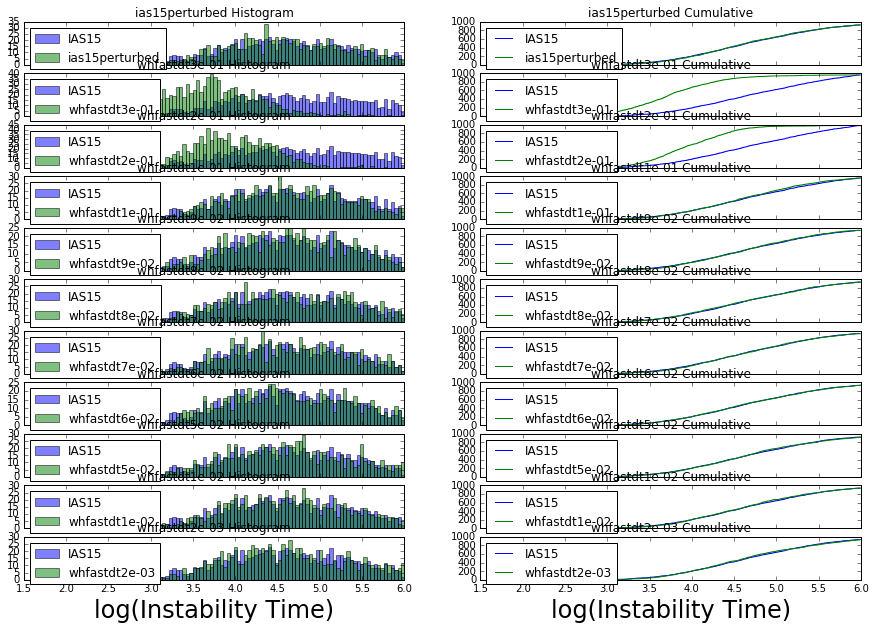

In [17]:
from scipy.stats.mstats import ks_2samp
%matplotlib inline
import matplotlib.pyplot as plt

Eerrs = []
ts = []
probsames = []
asymmetries = []
medianerrs = []
meanerrs = []
stdeverrs = []

Nbins = 100
bins = np.linspace(2,6,Nbins)
fig, axarr = plt.subplots(nrows=len(datasets), ncols=2, sharex=True, figsize=(15,10))
for i, key in enumerate(datasets):
    print(key)
    print('-----')
    df = dfs[key]
    ref_time = df_ref.integ_time.sum()/3600 
    df_time = df.integ_time.sum()/3600 # hours
    print('Took {0} hours compared to {1} for reference IAS15 simulation ({2:.2f}x faster)'.format(df_time, ref_time, ref_time/df_time))
    m1 = df_ref.Stable == False
    m2 = df.Stable == False
    print('{0} unstable outcomes vs {1} in reference IAS15 simulations'.format(m2.sum(), m1.sum()))
    m3 = m1 & m2
    print('{0} initial conditions where both were unstable'.format(m3.sum()))
    Ee2 = df.loc[m3, 'Rel_Eerr']
    Eerrs.append(np.log10(Ee2.loc[Ee2 != 0]))
    df_ref_t = np.log10(df_ref.loc[m3, 'Norbits_instability'])
    df_t = np.log10(df.loc[m3, 'Norbits_instability'])
    ts.append(df_t)
    d,p = ks_2samp(df_ref_t, df_t)
    medianerrs.append(abs(df_t.median()-df_ref_t.median())/df_ref_t.median())
    meanerrs.append(abs(df_t.mean()-df_ref_t.mean())/df_ref_t.mean())
    stdeverrs.append(abs(df_t.std()-df_ref_t.std())/df_ref_t.std())
    probsames.append(p)
    print('Median: {0:.4} vs {1:.4} (IAS15). Rel error = {2:.3e}'.format(df_t.median(), df_ref_t.median(), medianerrs[-1]))
    print('Mean: {0:.4} vs {1:.4} (IAS15). Rel error = {2:.3e}'.format(df_t.mean(), df_ref_t.mean(), meanerrs[-1]))
    print('Standard Deviation: {0:.4} vs {1:.4} (IAS15). Rel error = {2:.3e}'.format(df_t.std(), df_ref_t.std(), stdeverrs[-1]))
    print('Probability of being drawn from the same distribution = {0}'.format(p))
    
    gt = []
    for j in range(2000):
        if df.loc[j].Stable == False and df_ref.loc[j].Stable == False:
            if df.loc[j].Norbits_instability >= df_ref.loc[j].Norbits_instability:
                gt.append(1)
            else:
                gt.append(0)

    Ngreater = np.asarray(gt).sum()
    Nless = len(gt)-Ngreater
    asymmetry = (Ngreater-Nless)/float(Ngreater+Nless)
    asymmetries.append(asymmetry)
    
    print("Number of longer instability times: {0} Number shorter: {1} Asymmetry: {2}".format(Ngreater, Nless, asymmetry))
    axarr[i,0].set_title(key + ' Histogram')
    axarr[i,0].hist(df_ref_t, bins, alpha=0.5, label='IAS15')
    axarr[i,0].hist(df_t, bins, alpha=0.5, label=key)
    axarr[i,0].legend(loc='upper left')
    
    size = df_ref_t.size
    axarr[i,1].set_title(key+' Cumulative')
    axarr[i,1].step(np.sort(df_ref_t), np.arange(size), label='IAS15')
    axarr[i,1].step(np.sort(df_t), np.arange(size), label=key)
    axarr[i,1].legend(loc='upper left')
    print('*****')
    print('*****')
axarr[-1,0].set_xlabel('log(Instability Time)', fontsize=24)
axarr[-1,1].set_xlabel('log(Instability Time)', fontsize=24)

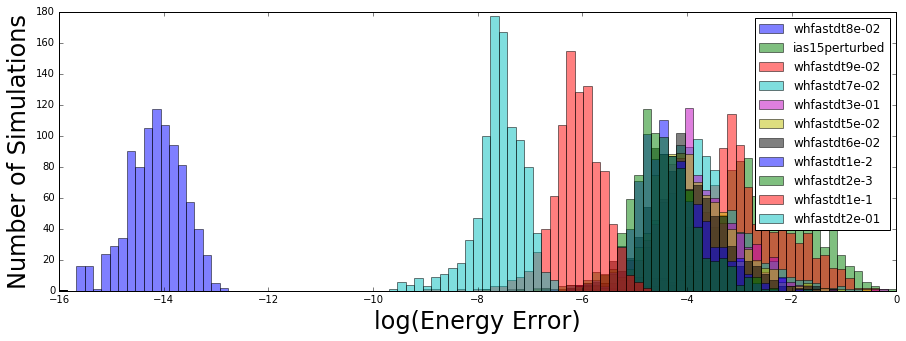

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

Nbins = 100
bins = np.linspace(-16,0,Nbins)

fig, ax = plt.subplots(figsize=(15,5))
for i,key in enumerate(dfs):
    ax.hist(Eerrs[i], bins, alpha=0.5, label=key)
ax.set_xlabel('log(Energy Error)', fontsize=24)
ax.set_ylabel('Number of Simulations', fontsize=24)
plt.legend()

In [19]:
len(dfs)

11

In [26]:
datasets

['ias15perturbed',
 'whfastdt3e-01',
 'whfastdt2e-01',
 'whfastdt1e-01',
 'whfastdt9e-02',
 'whfastdt8e-02',
 'whfastdt7e-02',
 'whfastdt6e-02',
 'whfastdt5e-02',
 'whfastdt1e-02',
 'whfastdt2e-03']

In [22]:
probsames

[0.93782408531881867,
 4.222962200242552e-115,
 1.0577446202427519e-88,
 0.20010768707215548,
 0.94155831373460364,
 0.89259513390562817,
 0.94033832727046807,
 0.98276129799580847,
 0.75299374088013238,
 0.3914800288409685,
 0.60717590492117135]

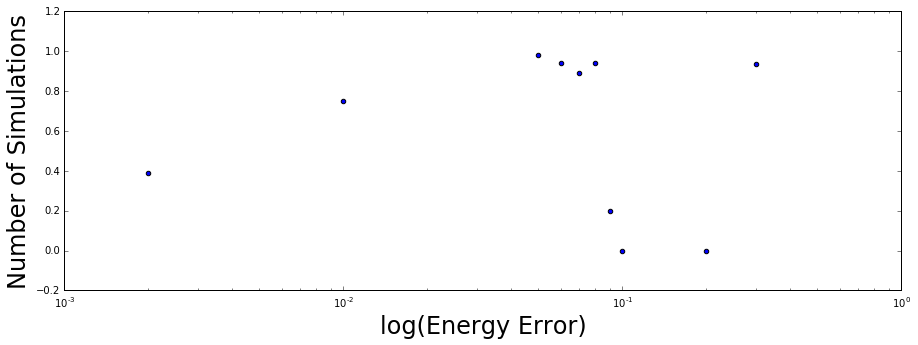

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))
for i,key in enumerate(datasets[1:]):
    ax.scatter(dts[i], probsames[i])
ax.set_xscale('log')
ax.set_xlabel('log(Energy Error)', fontsize=24)
ax.set_ylabel('Number of Simulations', fontsize=24)